In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("loan_train.csv")
test=pd.read_csv("loan_test.csv")
df_train=train.copy()
df_test=test.copy()

In [3]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df_train.shape

(614, 13)

In [5]:
df_test.shape

(367, 12)

In [6]:
column = list(df_train.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount"], axis=1).columns)

In [7]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df_train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Self_Employed'].fillna('No',inplace=True)
table = df_train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)



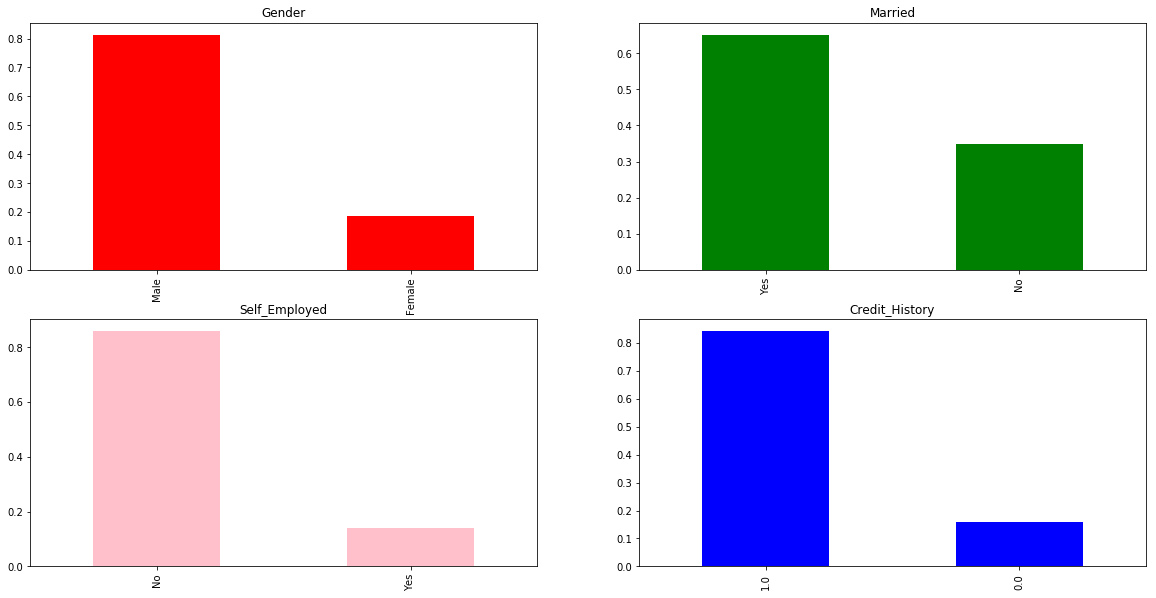

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color="red")

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color="green")

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color="pink")

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color="blue")



plt.show()

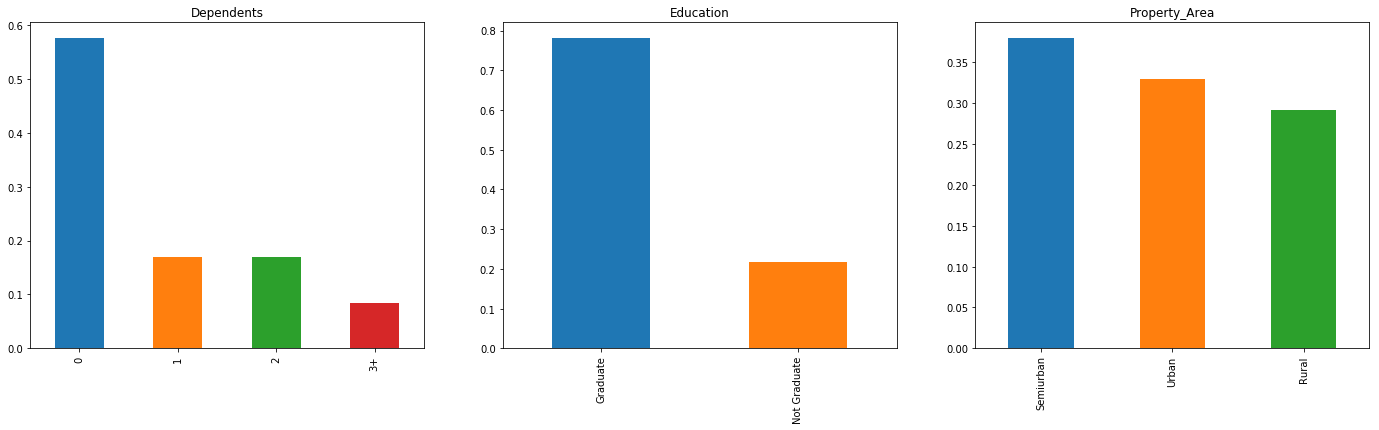

In [12]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

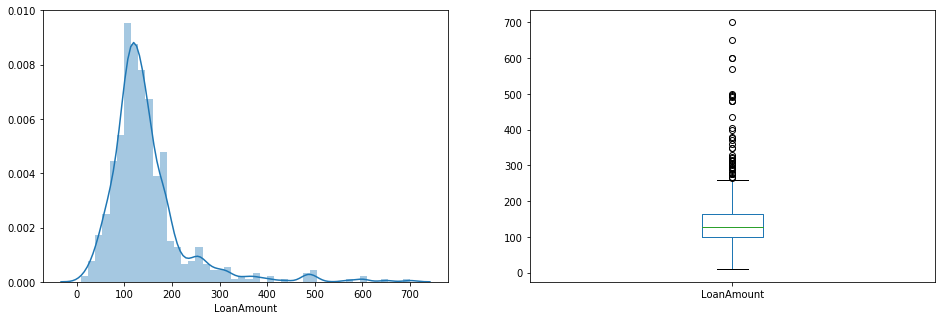

In [13]:
plt.subplot(121)
sns.distplot(df_train['LoanAmount'].dropna());
plt.subplot(122)
df_train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

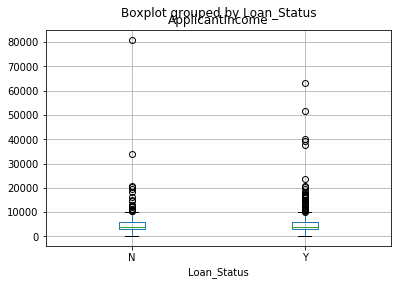

In [14]:
df_train.boxplot(column="ApplicantIncome",by="Loan_Status")

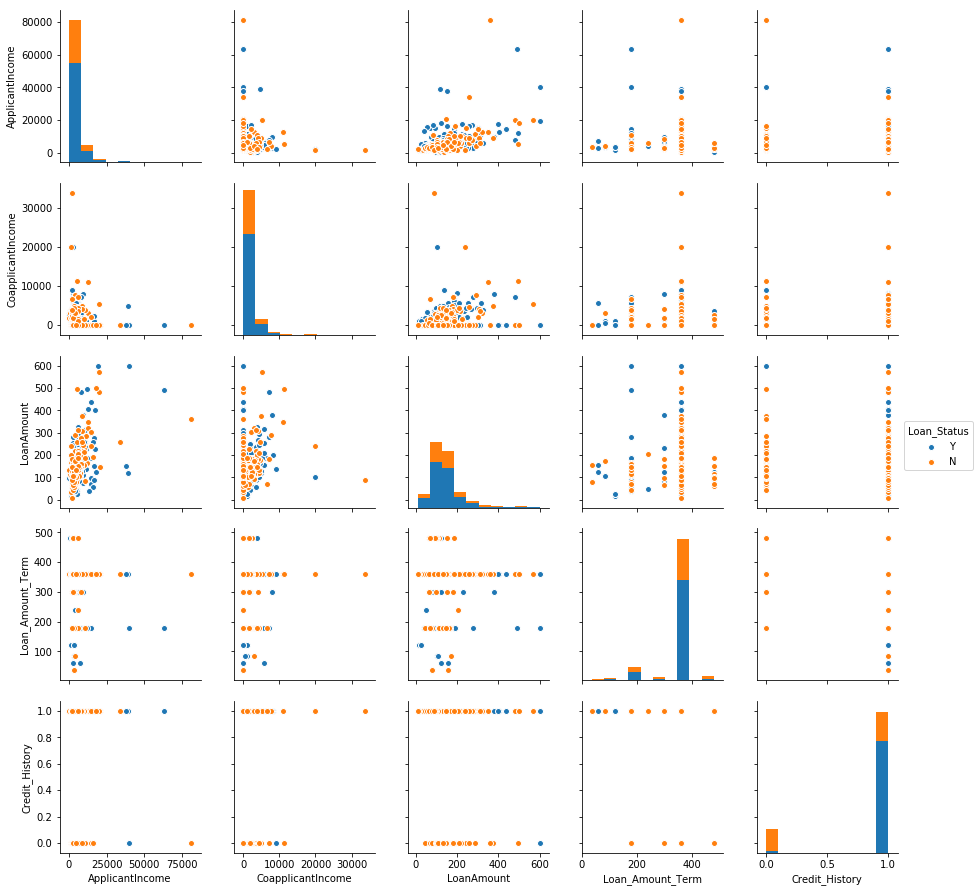

In [15]:
sns_df=df_train.dropna()
sns.pairplot(sns_df,hue="Loan_Status",size=2.5)

In [16]:
print(pd.crosstab(df_train['Gender'],df_train['Loan_Status']))
print(pd.crosstab(df_train['Married'],df_train['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


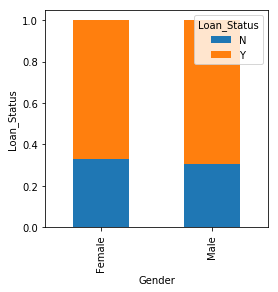

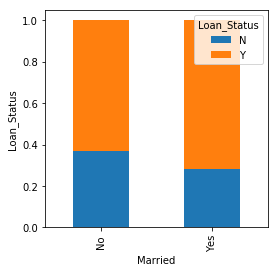

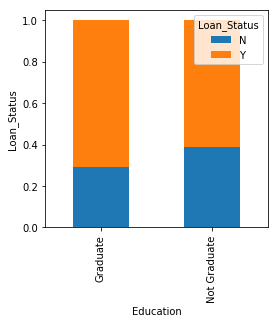

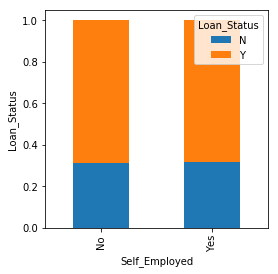

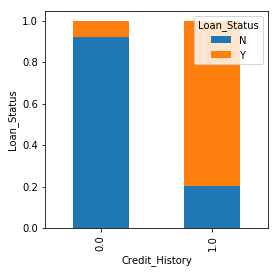

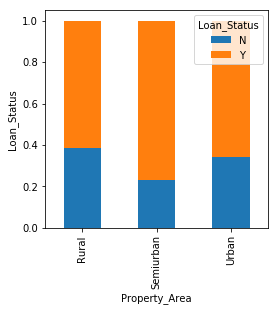

In [17]:
col=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area']
for i in col:
    data=pd.crosstab(df_train[i],df_train['Loan_Status'])
    data.div(data.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
    plt.xlabel(i)
    p = plt.ylabel('Loan_Status')


In [18]:
matrix = df_train.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059878,-0.002056
LoanAmount,0.565620,0.187828,1.000000,0.038926,-0.008301
Loan_Amount_Term,-0.045306,-0.059878,0.038926,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008301,0.001470,1.000000


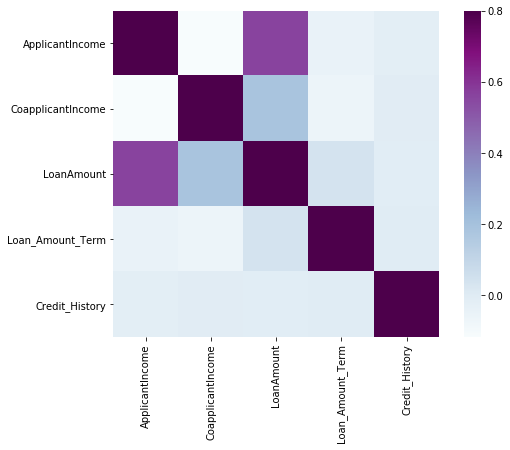

In [19]:
plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

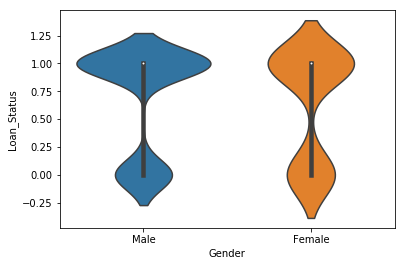

In [20]:
sns_df['Loan_Status'].replace(('Y','N'),(1,0),inplace=True)
sns.violinplot("Gender","Loan_Status",data=sns_df,plalette=["lightblue","lightpink"]);

In [21]:
table = df_train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [22]:
grps = df_train.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
grps

LoanAmount
Gender Married Self_Employed            
Female No      No             115.150901
               Yes            127.673833
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             131.272463
               Yes            173.625000
       Yes     No             151.490148
               Yes            168.379241

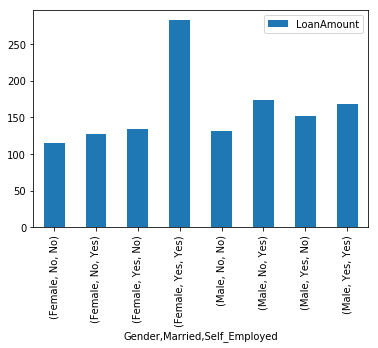

In [23]:
grps.plot(kind = 'bar')

In [24]:
grps = df_train.pivot_table(values=["LoanAmount"], index=["ApplicantIncome","CoapplicantIncome"], aggfunc=np.mean)
grps#.plot(kind = 'bar')

LoanAmount
ApplicantIncome CoapplicantIncome            
150             1800.0             135.000000
210             2917.0              98.000000
416             41667.0            350.000000
645             3683.0             113.000000
674             5296.0             168.000000
1000            3022.0             110.000000
1025            2773.0             112.000000
                5500.0             216.000000
1299            1086.0              17.000000
1378            1881.0             167.000000
1442            0.0                 35.000000
1500            1800.0             103.000000
1538            1425.0              30.000000
1600            20000.0            239.000000
1625            1803.0              96.000000
1668            3890.0             201.000000
1759            3541.0             131.000000
1782            2232.0             107.000000
1800            1213.0              47.000000
                2934.0              93.000000
1809            1868.0              90.000000
1811            1666.0              54.000000
1820            1719.0             100.000000
                1769.0              95.000000
1828            1330.0             100.000000
1830            0.0                146.412162
1836            33837.0             90.000000
1853            2840.0             114.000000
1863            1041.0              98.000000
1875            1875.0              97.000000
...                                       ...
14683           2100.0             304.000000
14866           0.0                 70.000000
14880           0.0                 96.000000
14999           0.0                242.000000
15000           0.0                300.000000
15759           0.0                 55.000000
16120           0.0                260.000000
16250           0.0                192.000000
16525           1014.0             150.000000
16666           0.0                275.000000
16667           2250.0              86.000000
16692           0.0                110.000000
17263           0.0                225.000000
17500           0.0                400.000000
18165           0.0                125.000000
18333           0.0                500.000000
19484           0.0                600.000000
19730           5266.0             570.000000
20166           0.0                650.000000
20233           0.0                480.000000
20667           0.0                146.412162
20833           6667.0             480.000000
23803           0.0                370.000000
33846           0.0                260.000000
37719           0.0                152.000000
39147           4750.0             120.000000
39999           0.0                600.000000
51763           0.0                700.000000
63337           0.0                490.000000
81000           0.0                360.000000

[588 rows x 1 columns]

In [25]:
loan_credit = df_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
loan_credit

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


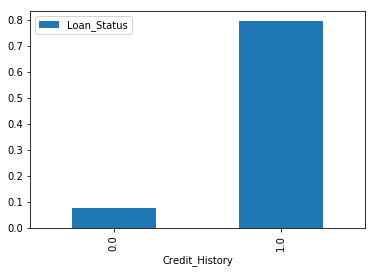

In [26]:
loan_credit.plot(kind = 'bar')

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [28]:

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
table = test.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
test['LoanAmount'].fillna(test[test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [30]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
351,LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural
320,LP002051,Male,Yes,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural
557,LP002795,Male,Yes,3+,Graduate,Yes,10139,0.0,260.0,360.0,1.0,Semiurban


In [31]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [32]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [33]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [38]:
# xtr,xvl = X.loc[train_index],X.loc[test_index]
# ytr,yvl = y[train_index],y[:367]    
model = LogisticRegression(random_state=1)
model.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
print(model.coef_)
print(model.intercept_)

[[ 4.70400786e-06 -5.46597762e-05 -1.68690909e-03 -3.10302275e-03
   2.76270678e+00 -2.17666704e-02 -4.57368413e-02 -2.94179456e-01
   2.26675944e-01  1.46692174e-02 -3.06176180e-01  2.66287077e-01
  -4.22836261e-02  9.92389558e-02 -1.66742468e-01 -8.95986742e-02
   2.20951625e-02 -2.67535434e-01  3.56853911e-01 -1.56821989e-01]]
[-0.06750351]


In [42]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [78]:
l=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']
d= pd.DataFrame(model.coef_,columns=l)
d_1=d.T

In [96]:

d_1.sort_values(by=0, ascending=False)

Var,0
Credit_History,2.762707
Property_Area_Semiurban,0.356854
Dependents_2,0.266287
Married_Yes,0.226676
Education_Graduate,0.099239
Self_Employed_Yes,0.022095
Dependents_0,0.014669
ApplicantIncome,0.000005
CoapplicantIncome,-0.000055
LoanAmount,-0.001687


In [98]:
d_1.abs().sort_values(by=0, ascending=False)

Var,0
Credit_History,2.762707
Property_Area_Semiurban,0.356854
Dependents_1,0.306176
Married_No,0.294179
Property_Area_Rural,0.267535
Dependents_2,0.266287
Married_Yes,0.226676
Education_Not Graduate,0.166742
Property_Area_Urban,0.156822
Education_Graduate,0.099239


In [ ]:
pred_test = model.predict(test)
score = accuracy_score(yvl,pred_test)
print('accuracy_score',score)

In [ ]:
a = pd.read_csv("loan_train.csv")
a=a.drop("Loan_Status",axis=1)
b = pd.read_csv("loan_test.csv")
merged = a.merge(b, on='Loan_ID')
merged.to_csv("loan_1.csv", index=False)
